In [1]:
import pandas as pd

df = pd.read_csv("ngram_tweets.csv")
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295,135445,False,1262396333064892416
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706,82425,False,1257736426206031874
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665,56868,False,1257532112233803782
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855,62268,False,1257532114666508291
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122,33261,False,1257532110971318274


In [2]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [3]:
# Clean twitter data
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
def basic_clean(text) :
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords  = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
                                    

In [5]:
words = basic_clean(''.join(str(df['text'].tolist())))
print(words)

['loser', 'httpstcop5imhmjqs1', 'money', 'raised', 'rino', 'loser', 'socalled', 'lincoln', 'project', 'go', 'pocket', 'ive', 'done', 'judge', 'tax', 'regulation', 'healthcare', 'military', 'vet', 'choice', 'amp', 'protecting', 'great', '2a', 'love', 'trump', 'problem', 'beat', 'dont', 'know', 'win', 'socalled', 'lincoln', 'project', 'disgrace', 'honest', 'abe', 'dont', 'know', 'kellyanne', 'deranged', 'loser', 'husband', 'moonface', 'must', 'really', 'bad', 'john', 'weaver', 'lost', 'big', 'kasich', 'crazed', 'rick', 'wilson', 'lost', 'evan', 'mcmuffin', 'mcmullin', 'steve', 'schmidt', 'amp', 'reed', 'galvin', 'lost', 'john', 'mccain', 'romneys', 'campaign', 'manager', 'lost', 'big', 'amp', 'jennifer', 'horn', 'got', 'thrown', 'new', 'hampshire', 'republican', 'party', 'theyre', 'loser', 'abe', 'lincoln', 'republican', 'smile', 'get', 'even', 'many', 'failure', 'see', 'loser', 'type', 'dont', 'care', '252', 'new', 'federal', 'judge', '2', 'great', 'supreme', 'court', 'justice', 'rebuil

In [10]:
k = int(input("Enter n : "))
ngram_series = (pd.Series(nltk.ngrams(words,k)).value_counts())[:15]
ngram_series

Enter n : 5


(person, reacts, new, twist, fate)            6
(separate, winner, loser, person, reacts)     6
(loser, person, reacts, new, twist)           6
(winner, loser, person, reacts, new)          6
(without, ego, ill, show, loser)              5
(youre, never, loser, quit, trying)           4
(never, loser, quit, trying, mike)            4
(someone, without, ego, ill, show)            4
(show, someone, without, ego, ill)            4
(loser, quit, trying, mike, ditka)            4
(everyone, including, hater, loser, happy)    3
(reacts, new, twist, fate, donald)            3
(wish, everyone, including, hater, loser)     3
(new, twist, fate, donald, trump)             3
(bright, totally, overrated, loser, hater)    2
dtype: int64

Text(0.5, 0, ' No. of occurences')

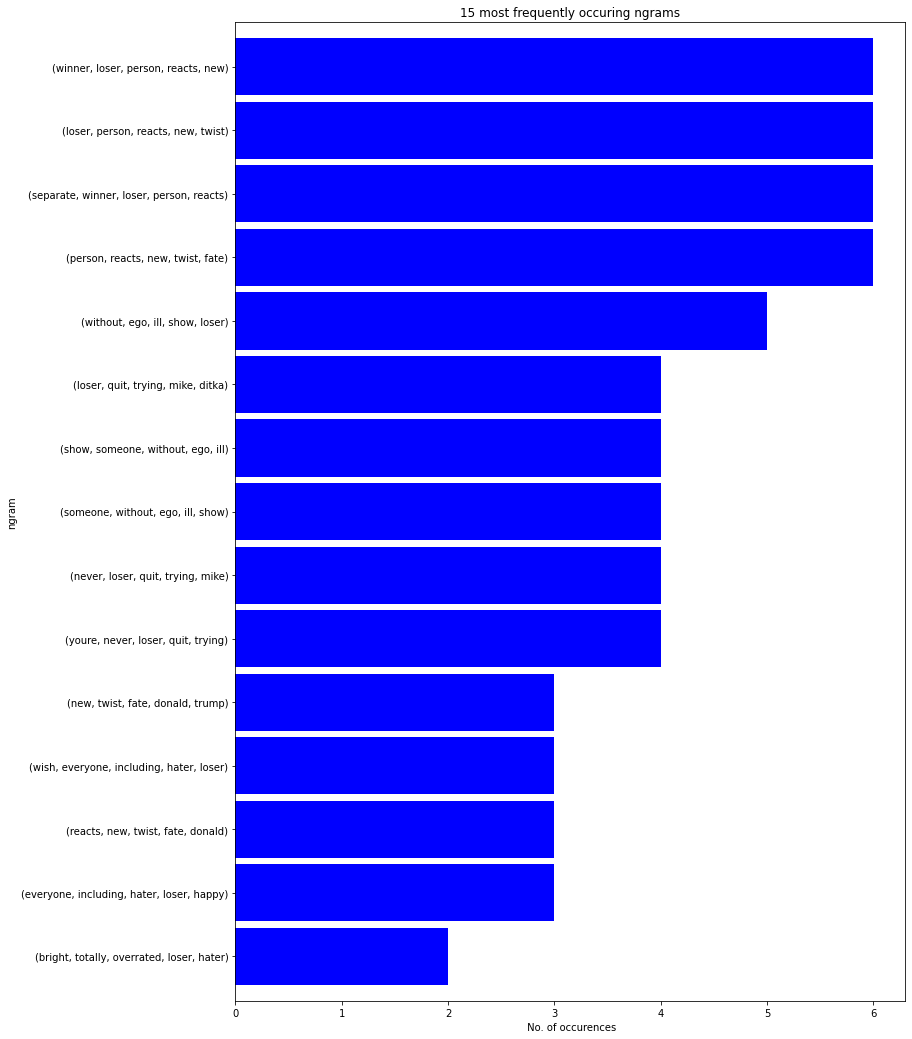

In [11]:
ngram_series.sort_values().plot.barh(color = 'blue', width = 0.9, figsize = (12,18))
plt.title('15 most frequently occuring ngrams')
plt.ylabel('ngram')
plt.xlabel(' No. of occurences')